<a href="https://colab.research.google.com/github/Rafael69696969/Probabilidad-y-Estad-stica-/blob/main/Probabilidad%20y%20estad%C3%ADsticaPractica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

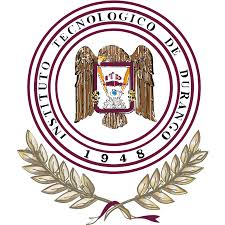

Probabilidad y estadistica

unidad 1

Grupo: 2z

Practica 6. Estadística descriptiva Dataset Autos

Alumno:Rafael Alejandro Arenas Ferrel

Docente: Dr: Jose Gabriel Rodriguez Rivas

1.- Cargar el Dataset de Autos y realizar las Estadísticas descriptivas básicas y medidas de tendencia central


In [15]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statistics import *

In [16]:
autos = pd.read_csv("autos2.csv", encoding = "ISO-8859-1")

In [17]:
autos.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [18]:
autos.price.max()

45400.0

In [19]:
autos.price.min()

5118.0

In [20]:
# Media
Precios = autos['price'].dropna()

media = sum(Precios) / len(Precios)
print(media)

13207.129353233831


In [21]:
# Mediana
mediana = median(autos.price)
print(mediana)

18150.0


In [22]:
# Moda
moda = multimode(autos.price)
print(moda)

[16500.0, 5572.0, 7957.0, 6229.0, 6692.0, 7609.0, 8921.0, 7295.0, 8845.0, 8495.0, 9279.0, 13499.0, 18150.0, 7775.0, 7898.0]


In [23]:
desviacion_estandar_precioa = autos.price.std()
print(desviacion_estandar_precioa)

7947.066341939271


In [24]:
autos.price.describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


**2.-Realizar un Histograma de precios de los automóviles**

In [25]:

import math


In [26]:
df = pd.DataFrame({'Precios': autos.price})
df

,Precios
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [27]:
# Calcular el número de intervalos utilizando la regla de Sturges
n = len(autos.price)
k = int( 1 + math.log2(100))
print("Valor de n = ", n , " \nNúmero de intervalos =", k)

Valor de n =  205  
Número de intervalos = 7


In [28]:
# Crear la tabla de frecuencias

tabla_frecuencia = pd.cut( df['Precios'], bins=k, include_lowest=True).value_counts().reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
3,"(33890.857, 39645.429]",7
4,"(28136.286, 33890.857]",6
5,"(22381.714, 28136.286]",5
6,"(39645.429, 45400.0]",3


In [29]:
# Ordenar la tabla de frecuencia por el intervalo
tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
5,"(22381.714, 28136.286]",5
4,"(28136.286, 33890.857]",6
3,"(33890.857, 39645.429]",7
6,"(39645.429, 45400.0]",3


In [30]:
# Generar columnas siguientes
tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()
tabla_frecuencia['Frec Rel Ac'] = tabla_frecuencia['Frec Rel'].cumsum()
tabla_frecuencia['Frec Porc Ac'] = tabla_frecuencia['Frec Porc'].cumsum()

# Mostrar la tabla de frecuencia
print(tabla_frecuencia)


                    Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
0   (5077.717, 10872.571]   105  0.512195  51.219512      105     0.512195   
1  (10872.571, 16627.143]    49  0.239024  23.902439      154     0.751220   
2  (16627.143, 22381.714]    26  0.126829  12.682927      180     0.878049   
5  (22381.714, 28136.286]     5  0.024390   2.439024      185     0.902439   
4  (28136.286, 33890.857]     6  0.029268   2.926829      191     0.931707   
3  (33890.857, 39645.429]     7  0.034146   3.414634      198     0.965854   
6    (39645.429, 45400.0]     3  0.014634   1.463415      201     0.980488   

   Frec Porc Ac  
0     51.219512  
1     75.121951  
2     87.804878  
5     90.243902  
4     93.170732  
3     96.585366  
6     98.048780  


Text(0, 0.5, 'Autos')

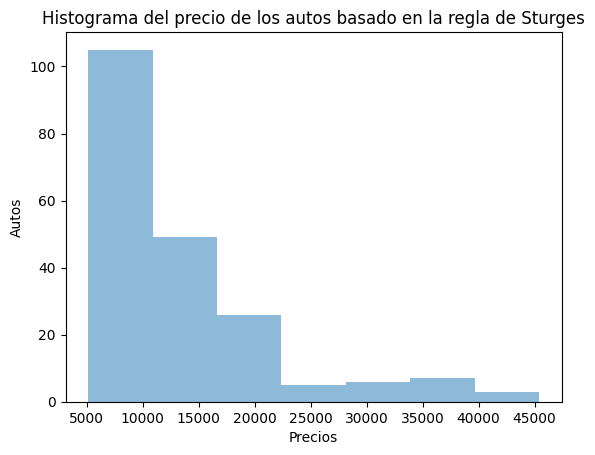

In [31]:
# Crear un histograma basado en la tabla de frecuencia
plt.hist(df['Precios'], bins=k, alpha = 0.5)
plt.title('Histograma del precio de los autos basado en la regla de Sturges')
plt.xlabel('Precios')
plt.ylabel('Autos')

*Conclusion*

 La distribución de los precios de los autos en el histograma muestra una asimetría hacia la derecha, lo que indica que la mayoría de los vehículos tienen precios más bajos (alrededor de 15,000). Conforme el precio se incrementa, la cantidad de autos en esos rangos disminuye considerablemente, evidenciando que los modelos más costosos son menos frecuentes en el conjunto de datos. Este patrón es característico de mercados donde los vehículos más económicos tienen una mayor oferta y demanda en comparación.

3.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo de vehículo (body style)

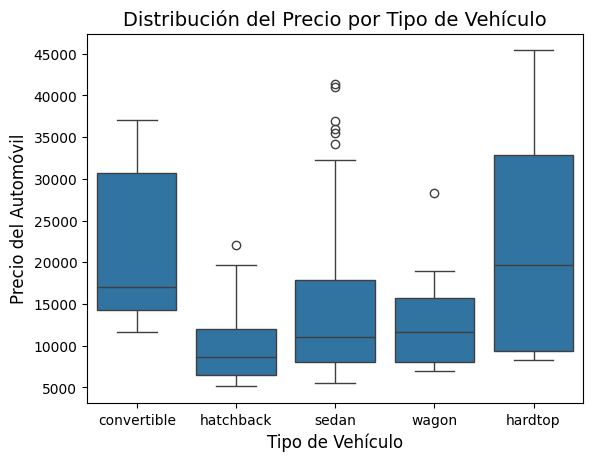

In [32]:

sns.boxplot(x='body-style', y='price', data = autos)
plt.title('Distribución del Precio por Tipo de Vehículo', fontsize=14)
plt.xlabel('Tipo de Vehículo', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()

Conclusión: El diagrama de cajas revela cómo varían los precios según el tipo de vehículo. Se aprecia que los convertibles y hardtops tienen los costos más elevados y una mayor dispersión en comparación con el resto. Por otro lado, los hatchbacks y wagons presentan precios más bajos y menos variabilidad. Asimismo, el segmento de los sedanes exhibe numerosos valores atípicos, lo que indica la presencia de modelos con precios considerablemente más altos que el promedio. Esto sugiere que los vehículos deportivos y de lujo, como los convertibles y hardtops, abarcan un rango de precios más amplio y pueden alcanzar valores.

4.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo tracción ruedas (drive wheels)

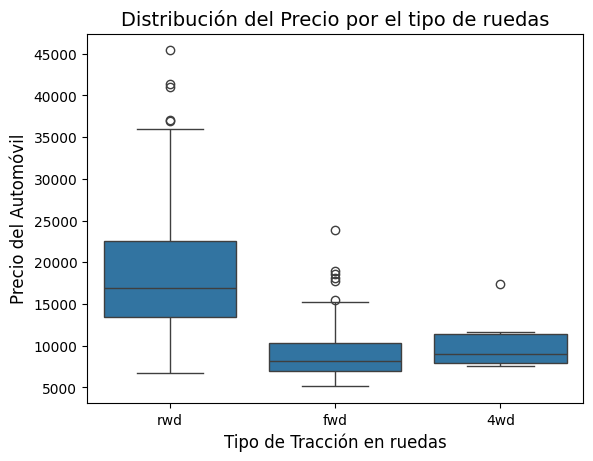

In [33]:
sns.boxplot(x='drive-wheels', y='price', data = autos)
plt.title('Distribución del Precio por el tipo de ruedas', fontsize=14)
plt.xlabel('Tipo de Tracción en ruedas', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()


El gráfico muestra que los automóviles con tracción trasera (rwd) tienen una mayor variabilidad en los precios, con una mediana más alta en comparación con los vehículos de tracción delantera (fwd) y tracción en las cuatro ruedas (4wd). Además, los automóviles rwd presentan más valores atípicos con precios significativamente altos. Por otro lado, los vehículos fwd y 4wd tienden a tener precios más bajos y una distribución de precios más compacta.

5.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y la ubicación del motor (engine-location)

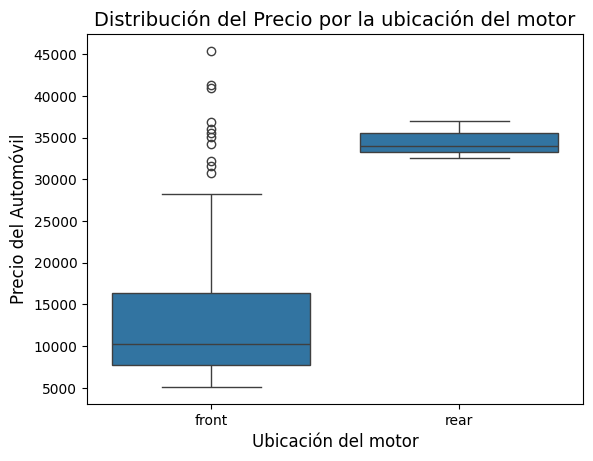

In [34]:
sns.boxplot(x='engine-location', y='price', data = autos)
plt.title('Distribución del Precio por la ubicación del motor', fontsize=14)
plt.xlabel('Ubicación del motor', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()

Los automóviles con motor ubicado en la parte trasera (rear) tienen precios más elevados y menos dispersión en comparación con aquellos con motor delantero (front). La mayoría de los vehículos con motor delantero tienen precios más bajos, pero con una gran cantidad de valores atípicos que alcanzan precios altos.

La disposición del motor y el tipo de tracción tienen un impacto significativo en el precio de los automóviles. Los vehículos con motor trasero y tracción trasera suelen tener un costo más elevado, lo que indica que estos ajustes están relacionados con modelos de alto rendimiento o de gama alta. En contraste, los automóviles con motor delantero y tracción delantera presentan precios más accesibles, con una distribución más compacta yc.